# Codificação dos QR Codes:
Apoios:
tipo, posicao

Cargas:

    Pontuais: tipo, posicao, modulo
    
    Distribuidas: tipo, posicao_i, posicao_f, modulo
    
    Triangulares: tipo, posicao_i, posicao_f, modulo (vale lembrar que posicao_f corresponde ao lado em que se encontra a altura do triangulo)

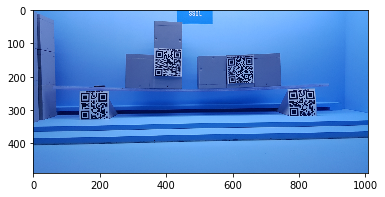

resized
[[1, {'posicao': '20'}], [0, {'posicao': '80'}]]
[[{'posicao_i': '30', 'posicao_f': ' 60', 'modulo': '3'}]]
[]
[[{'posicao_i': '30', 'posicao_f': '70', 'modulo': '10'}]]
CPU times: user 4.21 s, sys: 44 ms, total: 4.26 s
Wall time: 4.23 s


In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pyzbar.pyzbar as pyzbar
import copy
from resizeimage import resizeimage
def fun():
    image = cv2.imread('img/20190708_002617.jpg')

    h, w = image.shape[:2]
    image = image[:,:,::-1]
    if w > 1600:
        resized = cv2.resize(image, (int(w/4), int(h/4)), interpolation = cv2.INTER_AREA)
        plt.imshow(resized)
        plt.show()
        image = resized
        h, w = image.shape[:2]
        print("resized")
    s = int(w/400)
    
    #s = 1
    #s = 1 if s == 0 else s
    i = 0
    j = 1
    last_size = 0
    all_data = []
    while(j < w):
        #blank_image2[:, :i] = image[:, :j]
        data = pyzbar.decode(image[:, i:j])
        #plt.imshow(image[:, i:j])
        #plt.show()
        if data != []:
            all_data.append(data)
        data = []
        #plt.imshow(image[:, i:j])
        #plt.show()
        if len(all_data) > last_size:
            i = j
            #print(all_data)
            last_size = len(all_data)
        j+=s


    #image = image[:, 2000:3000]
    #plt.imshow(image)
    triangulares = []
    pontuais = []
    distribuidas = []
    apoios1 = []
    apoios2 = []

    #all_data = pyzbar.decode(image)

    for qr in all_data:
        #print(qr)
        a = str(qr[0]).replace("b\'", '').replace("\'", '').split(', ')
        if 'apoio1' in a[0]:
            apoios1.append(a)
        elif 'apoio2' in a[0]:
            apoios2.append(a)
        elif 'triangular' in a[0]:
            triangulares.append(a)
        elif 'distribuida' in a[0]:
            distribuidas.append(a)
        elif 'pontual' in a[0]:
            pontuais.append(a)


    apoios = []
    for a in apoios2:
        apoios.append([1, {"posicao": a[1]}])
        apoios = copy.copy(apoios)

    for a in apoios1:
        apoios.append([0, {"posicao": a[1]}])
        apoios = copy.copy(apoios)

    cargas_pontuais = []
    for c in pontuais:
        cargas_pontuais.append([{"posicao": c[1], "modulo": c[2]}])

    cargas_distribuidas = []
    for c in distribuidas:
        cargas_distribuidas.append([{"posicao_i": c[1], "posicao_f": c[2], "modulo": c[3]}])

    cargas_triangulares = []
    for c in triangulares:
        cargas_triangulares.append([{"posicao_i": c[1], "posicao_f": c[2], "modulo": c[3]}])

    print(apoios)
    print(cargas_distribuidas)
    print(cargas_pontuais)
    print(cargas_triangulares)
%time fun()